# EECS731
## Project 4 - Major Leagues

NFL, MLB, NBA and Soccer scores
1. Set up a data science project structure in a new git repository in your GitHub account
2. Pick one of the game data sets depending your sports preference
https://github.com/fivethirtyeight/nfl-elo-game
https://github.com/fivethirtyeight/data/tree/master/mlb-elo
https://github.com/fivethirtyeight/data/tree/master/nba-carmelo
https://github.com/fivethirtyeight/data/tree/master/soccer-spi
3. Load the data set into panda data frames
4. Formulate one or two ideas on how feature engineering would help the data set to establish additional value using exploratory data analysis
5. Build one or more regression models to determine the scores for each team using the other columns as features
6. Document your process and results
7. Commit your notebook, source code, visualizations and other supporting files to the git repository in GitHub
<br>
***

# Selected MLB dataset 
https://github.com/fivethirtyeight/data/tree/master/mlb-elo 

In [1]:
from pandas import read_csv, Series, pivot_table, get_dummies, concat, isnull
from numpy import isnan, any, all, isfinite, where, column_stack,ravel

# Feature engineering and selection
from sklearn.preprocessing import LabelEncoder
from sklearn.multioutput import MultiOutputClassifier, MultiOutputRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

# models
#   Regression models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# model selecion
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold

# models prediction
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score


# plots
from matplotlib.pyplot import figure , imshow, axis, show, plot, title, xlabel, ylabel
from seaborn import heatmap

In [2]:
df = read_csv("../data/raw/mlb_elo.csv")
df.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2
0,2020-10-10,2020,1,d,LAD,SDP,1598.290926,1525.832831,0.635558,0.364442,...,NaN,NaN,NaN,NaN,0.620261,0.379739,NaN,NaN,NaN,NaN
1,2020-10-10,2020,1,d,ATL,FLA,1543.508397,1482.006574,0.615867,0.384133,...,NaN,NaN,NaN,NaN,0.608742,0.391258,NaN,NaN,NaN,NaN
2,2020-10-09,2020,1,d,SDP,LAD,1525.832831,1598.290926,0.364442,0.635558,...,NaN,NaN,NaN,NaN,0.379739,0.620261,NaN,NaN,NaN,NaN
3,2020-10-09,2020,1,d,TBD,NYY,1566.075394,1557.931446,0.515622,0.484378,...,NaN,NaN,NaN,NaN,0.507634,0.492366,NaN,NaN,NaN,NaN
4,2020-10-09,2020,1,d,OAK,HOU,1547.618027,1542.711978,0.509413,0.490587,...,NaN,NaN,NaN,NaN,0.477541,0.522459,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220946 entries, 0 to 220945
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          220946 non-null  object 
 1   season        220946 non-null  int64  
 2   neutral       220946 non-null  int64  
 3   playoff       1655 non-null    object 
 4   team1         220946 non-null  object 
 5   team2         220946 non-null  object 
 6   elo1_pre      220946 non-null  float64
 7   elo2_pre      220946 non-null  float64
 8   elo_prob1     220946 non-null  float64
 9   elo_prob2     220946 non-null  float64
 10  elo1_post     220926 non-null  float64
 11  elo2_post     220926 non-null  float64
 12  rating1_pre   220946 non-null  float64
 13  rating2_pre   220946 non-null  float64
 14  pitcher1      220896 non-null  object 
 15  pitcher2      220893 non-null  object 
 16  pitcher1_rgs  187193 non-null  float64
 17  pitcher2_rgs  187190 non-null  float64
 18  pitc

In [4]:
df.isnull().sum()

date                 0
season               0
neutral              0
playoff         219291
team1                0
team2                0
elo1_pre             0
elo2_pre             0
elo_prob1            0
elo_prob2            0
elo1_post           20
elo2_post           20
rating1_pre          0
rating2_pre          0
pitcher1            50
pitcher2            53
pitcher1_rgs     33753
pitcher2_rgs     33756
pitcher1_adj     34434
pitcher2_adj     34436
rating_prob1         0
rating_prob2         0
rating1_post        20
rating2_post        20
score1              20
score2              20
dtype: int64

## Let's look deeper at the datasets given
`mlb_elo.csv` contains game-by-game Elo ratings and forecasts back to 1871.

Column | Definition
-----| ---------
date | Date of game
season | Year of season
neutral | Whether game was on a neutral site
playoff | Whether game was in playoffs, and the playoff round if so
team1 | Abbreviation for home team
team2 | Abbreviation for away team
elo1_pre | Home team's Elo rating before the game
elo2_pre | Away team's Elo rating before the game
elo_prob1 | Home team's probability of winning according to Elo ratings
elo_prob2 | Away team's probability of winning according to Elo ratings
elo1_post | Home team's Elo rating after the game
elo2_post | Away team's Elo rating after the game
rating1_pre | Home team's rating before the game
rating2_pre | Away team's rating before the game
pitcher1 | Name of home starting pitcher
pitcher2 | Name of away starting pitcher
pitcher1_rgs | Home starting pitcher's rolling game score before the game
pitcher2_rgs | Away starting pitcher's rolling game score before the game
pitcher1_adj | Home starting pitcher's adjustment to their team's rating
pitcher2_adj | Away starting pitcher's adjustment to their team's rating
rating_prob1 | Home team's probability of winning according to team ratings and starting pitchers
rating_prob2 | Away team's probability of winning according to team ratings and starting pitchers
rating1_post | Home team's rating after the game
rating2_post | Away team's rating after the game
score1 | Home team's score
score2 | Away team's score

***
Looking at the above information:
- ***doesnt seems useful** (probably delete)
    - date
    - neutral
    
- List of columns with null values
    - Playoff columns only has 1655 values. Missing 219291 data
    - Elo1_post, Elo2_post, pitcher1, pitcher2, pitcher1_rgs, pitcher2, pitcher1_rgs, pitcher2_rgs, pitcher1_adj, pitcher2_adj, rating1_post, rating2_post
- It has 220946 rows
<br>
***


In [5]:
# Drop multiple columns such as date and playoff columns
df.drop(["date","playoff"], axis=1,inplace=True)
# strip and lowercase all string types cols
df = df.apply(lambda x: x.str.strip().str.lower() if x.dtype == "object" else x)
# Delete rows if any of the columns in subset list is NaN
df = df.dropna(subset=["score1","score2","pitcher1","pitcher2","elo1_post","elo2_post","pitcher1_rgs","pitcher2_rgs"])
print(df.shape)
df.head()

(187185, 24)


,season,neutral,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,...,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2
20,2020,0,sdp,stl,1522.312734,1520.100045,0.550128,0.449872,1525.832831,1516.579948,...,47.400000,57.310588,-17.746023,29.444071,0.461857,0.538143,1534.038131,1509.745224,4.0,0.0
21,2020,0,chc,fla,1517.011886,1478.403936,0.617874,0.382126,1513.409248,1482.006574,...,60.622663,50.317526,40.641459,5.064633,0.673112,0.326888,1517.959644,1475.108982,0.0,2.0
22,2020,0,lad,mil,1596.678175,1502.693145,0.712092,0.287908,1598.290926,1501.080394,...,56.674581,57.809816,21.716845,33.175306,0.673916,0.326084,1606.065971,1506.703444,3.0,0.0
23,2020,0,sdp,stl,1519.722828,1522.689951,0.540271,0.459729,1522.312734,1520.100045,...,52.966274,52.749116,7.282398,7.517466,0.544395,0.455605,1530.728125,1513.055229,11.0,9.0
24,2020,0,oak,chw,1545.674260,1507.785767,0.616569,0.383431,1547.618027,1505.842000,...,50.478180,49.661565,-1.921507,-6.888932,0.558056,0.441944,1532.981409,1513.624593,6.0,4.0


<AxesSubplot:>

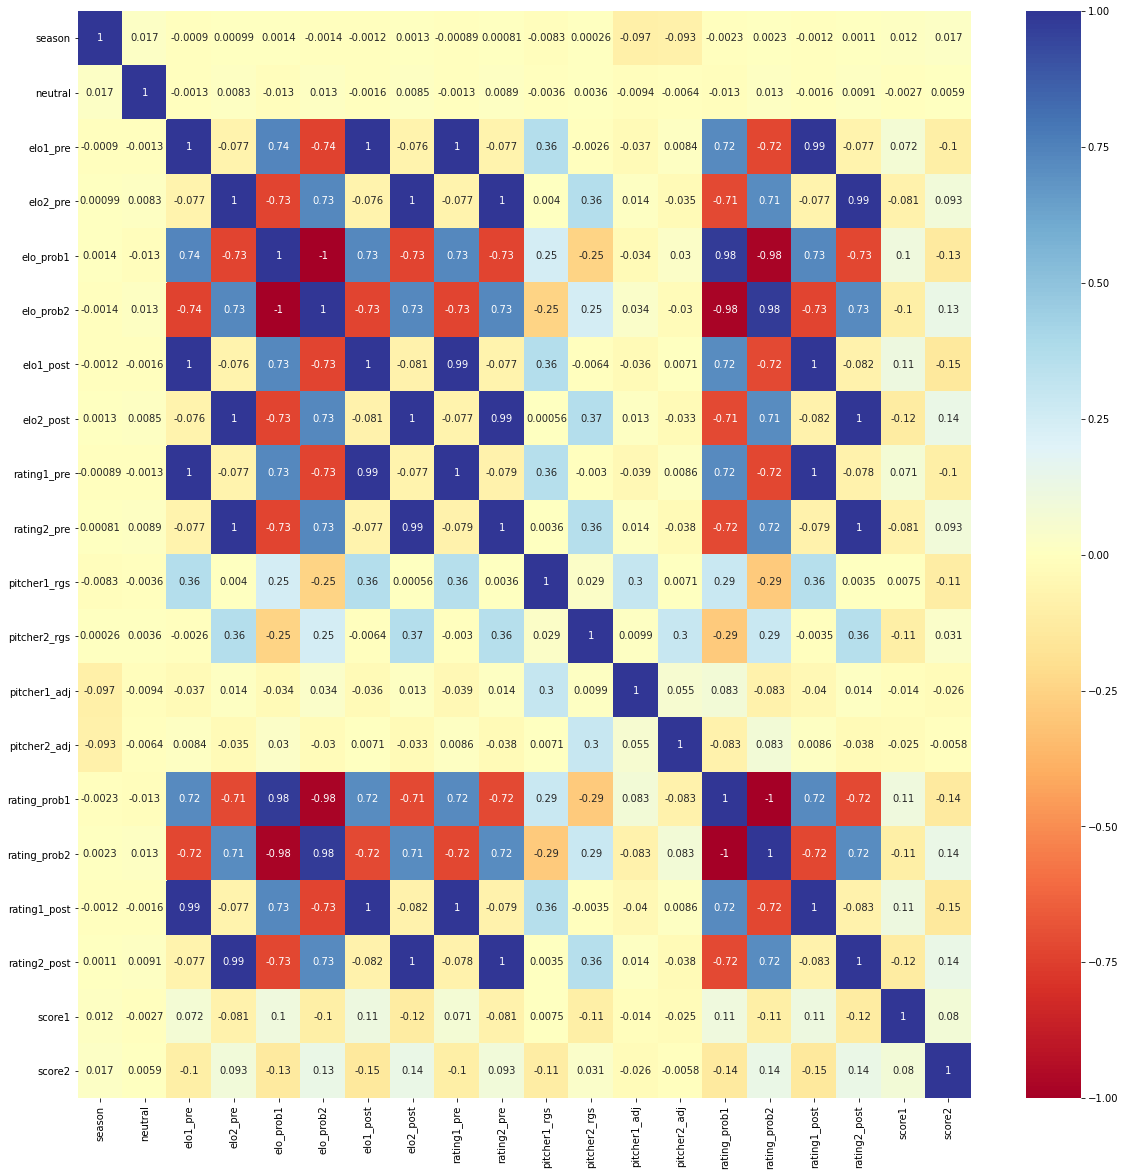

In [6]:
corr_matrix = df.corr()
corr_features = corr_matrix.index
figure(figsize=(20,20))
heatmap(df[corr_features].corr(), annot=True, cmap="RdYlBu")

***Delete the cols that have super high and super low corrolation***

In [7]:
df.drop(["season","neutral","rating_prob1","rating_prob2","rating1_pre","rating2_pre","rating1_post","rating2_post"], axis=1,inplace=True)

In [8]:
df

,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,pitcher1,pitcher2,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,score1,score2
20,sdp,stl,1522.312734,1520.100045,0.550128,0.449872,1525.832831,1516.579948,craig stammen,jack flaherty,47.400000,57.310588,-17.746023,29.444071,4.0,0.0
21,chc,fla,1517.011886,1478.403936,0.617874,0.382126,1513.409248,1482.006574,yu darvish,sixto sanchez,60.622663,50.317526,40.641459,5.064633,0.0,2.0
22,lad,mil,1596.678175,1502.693145,0.712092,0.287908,1598.290926,1501.080394,clayton kershaw,brandon woodruff,56.674581,57.809816,21.716845,33.175306,3.0,0.0
23,sdp,stl,1519.722828,1522.689951,0.540271,0.459729,1522.312734,1520.100045,zach davies,adam wainwright,52.966274,52.749116,7.282398,7.517466,11.0,9.0
24,oak,chw,1545.674260,1507.785767,0.616569,0.383431,1547.618027,1505.842000,mike fiers,dane dunning,50.478180,49.661565,-1.921507,-6.888932,6.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197731,pit,bos,1580.021000,1550.546000,0.601192,0.398808,1572.175000,1558.393000,kennb101,younc102,47.400000,46.573000,NaN,NaN,2.0,11.0
197732,pit,bos,1578.467000,1552.100000,0.595459,0.404541,1580.021000,1550.546000,phild101,dinnb101,49.448000,49.136000,NaN,NaN,5.0,4.0
197733,bos,pit,1554.672000,1575.895000,0.505328,0.494672,1552.100000,1578.467000,hught103,phild101,47.400000,48.523000,NaN,NaN,2.0,4.0
197734,bos,pit,1551.456000,1579.111000,0.492987,0.507013,1554.672000,1575.895000,dinnb101,leevs101,47.400000,47.400000,NaN,NaN,3.0,0.0


In [9]:
print(f"There are {len(df['team1'].unique())} unique values of Team1")
print(f"There are {len(df['team2'].unique())} unique values of Team2" )

print(f"There are {len(df['pitcher1'].unique())} unique values of pitcher1")
print(f"There are {len(df['pitcher2'].unique())} unique values of pitcher2" )

There are 30 unique values of Team1
There are 30 unique values of Team2
There are 5059 unique values of pitcher1
There are 5059 unique values of pitcher2


In [10]:
df["pitcher1"] = LabelEncoder().fit_transform(df['pitcher1'])
df["pitcher2"] = LabelEncoder().fit_transform(df['pitcher2'])

# df = get_dummies(df, columns=["team1","team2"],sparse=True)
df["team1"] = LabelEncoder().fit_transform(df['team1'])
df["team2"] = LabelEncoder().fit_transform(df['team2'])

df.head()

,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,pitcher1,pitcher2,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,score1,score2
20,22,25,1522.312734,1520.100045,0.550128,0.449872,1525.832831,1516.579948,1011,2151,47.400000,57.310588,-17.746023,29.444071,4.0,0.0
21,5,11,1517.011886,1478.403936,0.617874,0.382126,1513.409248,1482.006574,5021,4224,60.622663,50.317526,40.641459,5.064633,0.0,2.0
22,14,15,1596.678175,1502.693145,0.712092,0.287908,1598.290926,1501.080394,878,514,56.674581,57.809816,21.716845,33.175306,3.0,0.0
23,22,25,1519.722828,1522.689951,0.540271,0.459729,1522.312734,1520.100045,5029,32,52.966274,52.749116,7.282398,7.517466,11.0,9.0
24,19,6,1545.674260,1507.785767,0.616569,0.383431,1547.618027,1505.842000,3116,1090,50.478180,49.661565,-1.921507,-6.888932,6.0,4.0


***Before splitting dataset to train and test, we have to make sure there is NO NaN or infinity value***
It will throw an error if there is any NaN or infinity values

In [11]:
# Check if any column is NaN
print(f"Is there any column with NaN? {any(isnan(df))}")
# Check if all are finite values
print(f"Is all value finite? {all(isfinite(df))}")
df[df.isnull().any(axis=1)]

Is there any column with NaN? True
Is all value finite? False


,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,pitcher1,pitcher2,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,score1,score2
14368,4,6,1507.162,1483.228,0.568548,0.431452,1508.291,1482.099,3968,855,50.883,60.735,NaN,53.1946,5.0,4.0
14431,0,12,1534.355,1444.021,0.658847,0.341153,1536.345,1442.030,1920,4110,49.066,48.321,-6.3262,NaN,11.0,5.0
15227,15,1,1517.798,1469.353,0.602772,0.397228,1515.955,1471.196,4921,570,50.606,47.854,NaN,4.2300,2.0,3.0
33186,19,8,1551.161,1522.919,0.574621,0.425379,1547.720,1526.360,1074,2180,55.887,51.204,23.8525,NaN,2.0,7.0
37597,9,11,1471.856,1523.907,0.459719,0.540281,1469.038,1526.725,2192,2375,49.081,58.959,NaN,30.8508,3.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197731,21,4,1580.021,1550.546,0.601192,0.398808,1572.175,1558.393,2449,5015,47.400,46.573,NaN,NaN,2.0,11.0
197732,21,4,1578.467,1552.100,0.595459,0.404541,1580.021,1550.546,3617,1221,49.448,49.136,NaN,NaN,5.0,4.0
197733,4,21,1554.672,1575.895,0.505328,0.494672,1552.100,1578.467,2099,3617,47.400,48.523,NaN,NaN,2.0,4.0
197734,4,21,1551.456,1579.111,0.492987,0.507013,1554.672,1575.895,1209,2676,47.400,47.400,NaN,NaN,3.0,0.0


***Let's find out where are our null values***

In [12]:
# Get the index rows and cols of the NaN values location
idx, idy = where(isnull(df))
result = column_stack([df.index[idx], df.columns[idy]])
print(result)

[[14368 'pitcher1_adj']
 [14431 'pitcher2_adj']
 [15227 'pitcher1_adj']
 ...
 [197734 'pitcher2_adj']
 [197735 'pitcher1_adj']
 [197735 'pitcher2_adj']]


***We forget to drop pitcher1_adj and pitcher2_adj***

In [13]:
df.drop(["pitcher1_adj","pitcher2_adj"], axis=1,inplace=True)

In [14]:
print(f"Is there any column with NaN? {any(isnan(df))}")
# Check if all are finite values
print(f"Is all value finite? {all(isfinite(df))}")

Is there any column with NaN? False
Is all value finite? True


Looks good!
***
## Split our dataset to 80 (train) and 20(validation) 

In [15]:
X = df.drop(["score1","score2"], axis=1)
X #input

,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,pitcher1,pitcher2,pitcher1_rgs,pitcher2_rgs
20,22,25,1522.312734,1520.100045,0.550128,0.449872,1525.832831,1516.579948,1011,2151,47.400000,57.310588
21,5,11,1517.011886,1478.403936,0.617874,0.382126,1513.409248,1482.006574,5021,4224,60.622663,50.317526
22,14,15,1596.678175,1502.693145,0.712092,0.287908,1598.290926,1501.080394,878,514,56.674581,57.809816
23,22,25,1519.722828,1522.689951,0.540271,0.459729,1522.312734,1520.100045,5029,32,52.966274,52.749116
24,19,6,1545.674260,1507.785767,0.616569,0.383431,1547.618027,1505.842000,3116,1090,50.478180,49.661565
...,...,...,...,...,...,...,...,...,...,...,...,...
197731,21,4,1580.021000,1550.546000,0.601192,0.398808,1572.175000,1558.393000,2449,5015,47.400000,46.573000
197732,21,4,1578.467000,1552.100000,0.595459,0.404541,1580.021000,1550.546000,3617,1221,49.448000,49.136000
197733,4,21,1554.672000,1575.895000,0.505328,0.494672,1552.100000,1578.467000,2099,3617,47.400000,48.523000
197734,4,21,1551.456000,1579.111000,0.492987,0.507013,1554.672000,1575.895000,1209,2676,47.400000,47.400000


In [16]:
Y = df[["score1","score2"]]
Y #output

,score1,score2
20,4.0,0.0
21,0.0,2.0
22,3.0,0.0
23,11.0,9.0
24,6.0,4.0
...,...,...
197731,2.0,11.0
197732,5.0,4.0
197733,2.0,4.0
197734,3.0,0.0


In [17]:
X_train, X_validation , Y_train, Y_validation = train_test_split(X, Y, test_size=0.2, random_state=7,shuffle=True)

In [18]:
X_train

,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,pitcher1,pitcher2,pitcher1_rgs,pitcher2_rgs
54682,15,22,1508.747000,1508.30500,0.535117,0.464883,1504.523000,1512.530000,3081,2028,51.932000,44.270000
123001,17,14,1393.347000,1537.16900,0.334088,0.665912,1392.245000,1538.270000,1013,3658,47.161000,49.735000
127228,14,25,1519.797000,1511.49300,0.546356,0.453644,1516.919000,1514.371000,3661,1672,53.997000,47.051000
151186,8,18,1503.167000,1577.35500,0.428272,0.571728,1504.779000,1575.744000,202,542,48.477000,49.418000
134028,6,3,1565.336000,1428.60500,0.716109,0.283891,1565.954000,1427.987000,1883,4063,54.765000,48.042000
...,...,...,...,...,...,...,...,...,...,...,...,...
66475,22,7,1517.033000,1532.06900,0.512897,0.487103,1519.687000,1529.414000,4143,438,47.859000,44.255000
53479,13,3,1461.535000,1519.98100,0.450590,0.549410,1458.456000,1523.060000,3983,3666,46.261000,47.285000
10762,21,25,1536.421186,1523.53901,0.552879,0.447121,1538.704321,1521.255875,2385,3106,44.489136,51.583072
49709,21,17,1492.126000,1526.40800,0.485207,0.514793,1494.731000,1523.803000,3859,3776,54.950000,55.455000


In [19]:
Y_train

,score1,score2
54682,5.0,13.0
123001,7.0,9.0
127228,5.0,9.0
151186,5.0,4.0
134028,5.0,4.0
...,...,...
66475,7.0,3.0
53479,2.0,9.0
10762,5.0,1.0
49709,13.0,9.0


In [20]:
multioutput_not_supported_models = ["Linear Discriminant Analysis", "K Neighbour Classifier","Gaussian Naive Bayes","Random Forest Classifier","Decision Tree Classifier","Gradient Boosting Regression"]
regression_models = ["Linear Regression","Random Forest Regression","Gradient Boosting Regression","MLP Regression"]
def evaluate_model(name, model, X_t, X_v, Y_t, Y_v):
    if name in multioutput_not_supported_models:
        # Add a MutliOutputCLassifier to fix  
        # Error: multiclass-multioutput is not supported
        if name in regression_models:
            model = MultiOutputClassifier(model)
        else:
            model = MultiOutputClassifier(model, n_jobs=-1)
    
    model.fit(X_t, Y_t)
    prediction = model.predict(X_v)
    
    if name in regression_models:
        acc_score = r2_score(Y_v, prediction)   
    elif name in multioutput_not_supported_models:
        # We have to change Y_validation(df) to numpy then flatten
        acc_score = accuracy_score(Y_v.to_numpy().flatten(), prediction.flatten())
    else: 
        acc_score = accuracy_score(Y_v, prediction)

    print(f"{name}'s accuracy score is {acc_score}" )

In [21]:
models = []
# Regression models
models.append(('Linear Regression', LinearRegression()))
models.append(('Random Forest Regression', RandomForestRegressor()))
models.append(('MLP Regression', MLPRegressor()))

# Non Regression Models
models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
models.append(('K Neighbour Classifier', KNeighborsClassifier()))
models.append(('Gaussian Naive Bayes', GaussianNB()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier()))

In [22]:
for name, model in models:
    evaluate_model(name, model, X_train, X_validation, Y_train, Y_validation)

Linear Regression's accuracy score is 0.42020520574037623
Random Forest Regression's accuracy score is 0.5097435429389281


/home/karen/anaconda3/envs/731/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Regression's accuracy score is -0.269534551337314
Linear Discriminant Analysis's accuracy score is 0.1835082939338088
K Neighbour Classifier's accuracy score is 0.11041215909394449
Gaussian Naive Bayes's accuracy score is 0.13167454657157357
Decision Tree Classifier's accuracy score is 0.1440820578572001


# Let's try to increase the accuracy
## with standardize then normalize
Standardize - because var are measured in diff scales, they do not contribute equally. Thus, creating bias. Standardize will make it to be (0-1)

In [23]:
X_scaled = X
X_scaled = MinMaxScaler().fit_transform(X_scaled)
X_scaled = Normalizer().fit_transform(X_scaled)

X_scaled

array([[0.39234034, 0.4458413 , 0.29837347, ..., 0.21993779, 0.1464764 ,
        0.26313712],
       [0.08751093, 0.19252405, 0.28276064, ..., 0.42387265, 0.3026904 ,
        0.17416765],
       [0.24693362, 0.26457173, 0.43743006, ..., 0.05197978, 0.25721668,
        0.26630088],
       ...,
       [0.06785075, 0.35621645, 0.34336226, ..., 0.35177289, 0.13932276,
        0.1478882 ],
       [0.07098386, 0.37266527, 0.35302477, ..., 0.27227321, 0.14575619,
        0.14102709],
       [0.06213641, 0.32621613, 0.31543732, ..., 0.32214679, 0.12758908,
        0.12344942]])

In [24]:
X_scaled_train, X_scaled_validation , Y_scaled_train, Y_scaled_validation = train_test_split(X_scaled, Y, test_size=0.2, random_state=7,shuffle=True)

In [25]:
for name, model in models:
    evaluate_model(name, model,X_scaled_train, X_scaled_validation , Y_scaled_train, Y_scaled_validation)

Linear Regression's accuracy score is 0.4152547951791742
Random Forest Regression's accuracy score is 0.5050784010002858


/home/karen/anaconda3/envs/731/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Regression's accuracy score is 0.4897006175969166
Linear Discriminant Analysis's accuracy score is 0.18398910169084062
K Neighbour Classifier's accuracy score is 0.11456580388385822
Gaussian Naive Bayes's accuracy score is 0.12836231535646553
Decision Tree Classifier's accuracy score is 0.1411304324598659


# Summary
- Regression model tend to do better than non-regression model
- The best model is Random Forest Regression
- Even with standarized then normalized, it doesnt increase the accuracy